#Лабораторная и практическая работа 4. Кузьменко Сергей БД-231м

##**Практическая 4. Вариант 18. Анализ интернет-трафика компании.**

Проанализируйте данные о трафике на сайте компании. Какие страницы вызывают наибольший интерес пользователей?

Нашел близкий по теме датасет про популярность вебсайтов в разных странах.
**Источник:** https://www.kaggle.com/datasets/bpali26/popular-websites-across-the-globe?resource=download

Таким образом мы ответим, какие страницы вызывают наибольший интерес у пользователей России

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Web_Scrapped_websites.csv', delimiter=',', encoding='ISO-8859-1')
df.head()

,Country_Rank,Website,Trustworthiness,Avg_Daily_Visitors,Child_Safety,Avg_Daily_Pageviews,Privacy,Facebook_likes,Twitter_mentions,Google_pluses,...,Month_Average_Daily_Reach_percentage,Daily_Pageviews_percentage,Month_Average_Daily_Pageviews_percentage,Daily_Pageviews_per_user_percentage,Location,Hosted_by,Subnetworks,Registrant,Registrar,country
0,1,www.google.com.af,Excellent,NaN,Excellent,NaN,Excellent,9,1,37,...,1.0,-5.1,12.5,-4.1,United States,Google Inc.,216.58.203.227,NaN,NaN,Afghanistan
1,2,www.google.com,Excellent,515 007 350,Excellent,4 192 159 833,Excellent,94.2K,11.2K,11.7M,...,-1.1,1.8,-6.3,2.1,United States,Google Inc.,216.58.194.100,DNS Admin (Google Inc.),MARKMONITOR INC.,Afghanistan
2,3,www.youtube.com,Excellent,506 457 282,Excellent,2 679 159 025,Excellent,13.5K,16.5K,19.3M,...,1.8,9.7,0.5,3.8,United States,Google Inc.,172.217.2.238,DNS Admin (Google Inc.),MARKMONITOR INC.,Afghanistan
3,4,www.facebook.com,Excellent,270 071 255,Good,1 082 985 733,Excellent,5.87M,64.4K,127K,...,-1.5,-8.2,-2.2,-8.2,Ireland,Facebook,31.13.73.36,"Domain Administrator (Facebook, Inc.)",MARKMONITOR INC.,Afghanistan
4,5,www.yahoo.com,Excellent,99 572 035,Excellent,383 352 336,Excellent,17.2K,1.11K,798K,...,-0.8,-4.9,-0.5,-3.2,United States,Yahoo! Inc.,"98.139.180.149, 98.139.183.24",Domain Administrator (Yahoo! Inc.),MARKMONITOR INC.,Afghanistan


Будем ориентироваться на показатель Avg_Daily_Visitors. В нем содержаться пробелы. Необходимо првести предобработку

In [3]:
df['Avg_Daily_Visitors'] = pd.to_numeric(df['Avg_Daily_Visitors'].str.replace(' ', ''), errors='coerce')
df.head()

,Country_Rank,Website,Trustworthiness,Avg_Daily_Visitors,Child_Safety,Avg_Daily_Pageviews,Privacy,Facebook_likes,Twitter_mentions,Google_pluses,...,Month_Average_Daily_Reach_percentage,Daily_Pageviews_percentage,Month_Average_Daily_Pageviews_percentage,Daily_Pageviews_per_user_percentage,Location,Hosted_by,Subnetworks,Registrant,Registrar,country
0,1,www.google.com.af,Excellent,NaN,Excellent,NaN,Excellent,9,1,37,...,1.0,-5.1,12.5,-4.1,United States,Google Inc.,216.58.203.227,NaN,NaN,Afghanistan
1,2,www.google.com,Excellent,515007350.0,Excellent,4 192 159 833,Excellent,94.2K,11.2K,11.7M,...,-1.1,1.8,-6.3,2.1,United States,Google Inc.,216.58.194.100,DNS Admin (Google Inc.),MARKMONITOR INC.,Afghanistan
2,3,www.youtube.com,Excellent,506457282.0,Excellent,2 679 159 025,Excellent,13.5K,16.5K,19.3M,...,1.8,9.7,0.5,3.8,United States,Google Inc.,172.217.2.238,DNS Admin (Google Inc.),MARKMONITOR INC.,Afghanistan
3,4,www.facebook.com,Excellent,270071255.0,Good,1 082 985 733,Excellent,5.87M,64.4K,127K,...,-1.5,-8.2,-2.2,-8.2,Ireland,Facebook,31.13.73.36,"Domain Administrator (Facebook, Inc.)",MARKMONITOR INC.,Afghanistan
4,5,www.yahoo.com,Excellent,99572035.0,Excellent,383 352 336,Excellent,17.2K,1.11K,798K,...,-0.8,-4.9,-0.5,-3.2,United States,Yahoo! Inc.,"98.139.180.149, 98.139.183.24",Domain Administrator (Yahoo! Inc.),MARKMONITOR INC.,Afghanistan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country_Rank                              9540 non-null   int64  
 1   Website                                   9540 non-null   object 
 2   Trustworthiness                           9540 non-null   object 
 3   Avg_Daily_Visitors                        9396 non-null   float64
 4   Child_Safety                              9540 non-null   object 
 5   Avg_Daily_Pageviews                       9396 non-null   object 
 6   Privacy                                   9540 non-null   object 
 7   Facebook_likes                            9540 non-null   object 
 8   Twitter_mentions                          9540 non-null   object 
 9   Google_pluses                             9540 non-null   object 
 10  LinkedIn_mentions                   

In [5]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Chile',
       'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Grenada',
       'Guadeloupe', 'Guam', 'Guatemala', '

Давайте оставим для исследования Россию

In [6]:
df = df[df.country == "Russia"]

Какие самые популярные сайты?

In [7]:
df_agg = df.groupby('Website')['Avg_Daily_Visitors'].sum().reset_index()#.sort_values(by = 'Avg_Daily_Pageviews' )
df_agg['Avg_Daily_Visitors'] = pd.to_numeric(df_agg['Avg_Daily_Visitors'])
df_agg.sort_values(by = 'Avg_Daily_Visitors', ascending=False ).head(11)

,Website,Avg_Daily_Visitors
11,www.google.com,518108189.0
48,www.youtube.com,506457282.0
8,www.facebook.com,270071255.0
44,www.wikipedia.org,118921355.0
42,www.vk.com,48174081.0
16,www.instagram.com,47854006.0
46,www.yandex.ru,29110541.0
23,www.microsoft.com,26567811.0
12,www.google.ru,26105701.0
39,www.twitch.tv,23056401.0


In [8]:
df.to_csv('web_site_dataset.csv')

##**Лабораторная 4. Вариант 18. Группировка клиентов по активности**

Используйте данные о клиентах и транзакциях для группировки клиентов по
уровню активности.

Определите категории клиентов с высокой, средней и низкой
активностью.

**Источник данных:** https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation

Датасет содержит информацию о банковских транзакциях с полями:

TransactionID: Идентификатор транзакции.

CustomerID: Идентификатор клиента.

CustomerDOB: Дата рождения клиента.

CustGender: Пол клиента.

CustLocation: Местоположение клиента.

CustAccountBalance: Баланс клиента на момент транзакции.

TransactionDate: Дата транзакции.

TransactionTime: Время транзакции.

TransactionAmount (INR): Сумма транзакции.

In [9]:
df = pd.read_csv('/content/bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


Посчитаем количество транзакций каждого клиента.

Посчитаем суммарную сумму всех транзакций для каждого клиента.

In [10]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce', dayfirst=True)
df_customer_act = df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TransactionAmount (INR)': 'sum'
  }
).reset_index()


df_customer_act = df_customer_act.rename(
    columns={'CustomerID': 'CustomerID',
             'TransactionID':'Transaction_count',
             'TransactionAmount (INR)': 'Total_TransactAmount'}
)
df_customer_act.head()

<ipython-input-10-208160c4007e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce', dayfirst=True)


,CustomerID,Transaction_count,Total_TransactAmount
0,C1010011,2,5106.0
1,C1010012,1,1499.0
2,C1010014,2,1455.0
3,C1010018,1,30.0
4,C1010024,1,5000.0


In [11]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_customer_act_scaled = scaler.fit_transform(df_customer_act[['Transaction_count', 'Total_TransactAmount']])

# Применяем K-Means с 3 кластерами (низкий, средний и высокий уровень активности)
model = KMeans(n_clusters=3, random_state=42)
df_customer_act['activity_cluster'] = model.fit_predict(df_customer_act_scaled)

df_customer_act['activity_cluster'].value_counts()

,count
activity_cluster,
0,738068
1,142515
2,3682


In [12]:
df_customer_act.head(5)

,CustomerID,Transaction_count,Total_TransactAmount,activity_cluster
0,C1010011,2,5106.0,1
1,C1010012,1,1499.0,0
2,C1010014,2,1455.0,1
3,C1010018,1,30.0,0
4,C1010024,1,5000.0,0


In [13]:
df_customer_act.groupby('activity_cluster').agg({
    'Transaction_count': 'mean',
    'Total_TransactAmount': 'mean'
}).reset_index()

,activity_cluster,Transaction_count,Total_TransactAmount
0,0,1.000000,1305.524016
1,1,2.143613,2797.853141
2,2,1.358501,78352.577827


In [15]:
df_customer_act.columns

Index(['CustomerID', 'Transaction_count', 'Total_TransactAmount',
       'activity_cluster'],
      dtype='object')

Визуализация кластеров

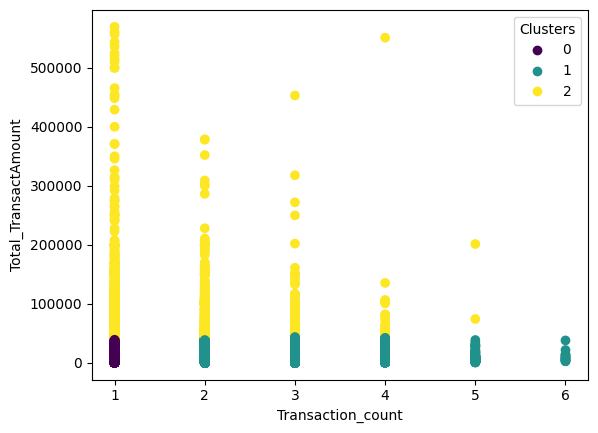

In [17]:
import matplotlib.pyplot as plt
df_customer_act_for_plot = df_customer_act[df_customer_act['Total_TransactAmount'] < 600000]
x_axis = df_customer_act_for_plot.iloc[:, 1]
y_axis = df_customer_act_for_plot.iloc[:, 2]

plt.xlabel('Transaction_count')
plt.ylabel('Total_TransactAmount')
scatter = plt.scatter(x_axis, y_axis, c=df_customer_act_for_plot.activity_cluster)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

Количество клиентов в каждом кластере

In [18]:
df_customer_act['activity_cluster'].value_counts().reset_index()

,activity_cluster,count
0,0,738068
1,1,142515
2,2,3682


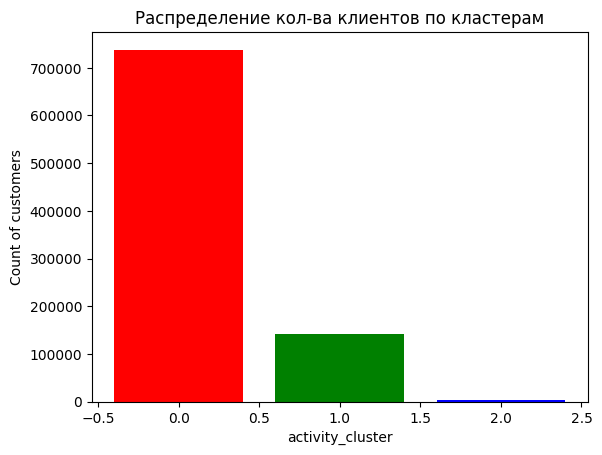

In [19]:
import matplotlib.pyplot as plt
df_customer_act_for_plot = df_customer_act[df_customer_act['Total_TransactAmount'] < 600000]
df_bar = df_customer_act['activity_cluster'].value_counts().reset_index()
plt.xlabel('activity_cluster')
plt.ylabel('Count of customers')
colors = ['red', 'green', 'blue']
plt.bar(df_bar['activity_cluster'], df_bar['count'], color = colors)
plt.title('Распределение кол-ва клиентов по кластерам')
plt.show()

In [20]:
df_bar2 = df_customer_act.groupby('activity_cluster').agg({
    'Total_TransactAmount': 'sum'
}).reset_index()
df_bar2

,activity_cluster,Total_TransactAmount
0,0,9.635655e+08
1,1,3.987360e+08
2,2,2.884942e+08


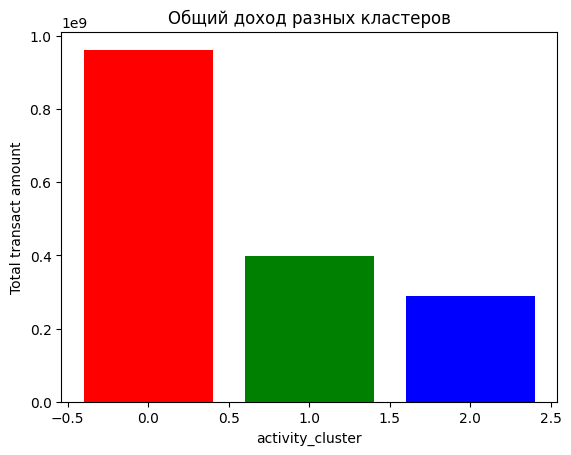

In [21]:
import matplotlib.pyplot as plt

plt.xlabel('activity_cluster')
plt.ylabel('Total transact amount')
colors = ['red', 'green', 'blue']
plt.bar(df_bar2['activity_cluster'], df_bar2['Total_TransactAmount'], color = colors)
plt.title('Общий доход разных кластеров')
plt.show()

**Вывод:** Кластера разделились неравномерно. Около 83% имеют низкую актвиность. 16% среднюю и только около 1% высокую активность
При это 1 % активных дает общую сумму транзаций сравнимо с 15% средних.

Тем не менее наибольший вклад в общую сумму транзаций дают наименее активные клиенты из-за большей массовости